## Cleaning and Preprocessing Data

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [17]:
import pandas as pd
data = pd.read_csv("train.csv")

In [18]:
data.head()

,id,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,1,2,Nibble,3,299,0,1,1,7,0,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2,2,No Name Yet,1,265,0,1,1,2,0,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,3,1,Brisco,1,307,0,1,2,7,0,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3
3,4,1,Miko,4,307,0,2,1,2,0,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2
4,5,1,Hunter,1,307,0,1,1,0,0,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2


In [19]:
ml_data = data.copy()

# ml_data = pd.get_dummies(ml_data, columns=["Type","Breed1","Breed2","Gender","Color1","Color2","Color3","MaturitySize","FurLength","Vaccinated","Dewormed","Sterilized","Health"])
# data_binary_encoded.head()

Convert Categorical data to numbers using Integer or Binary

In [20]:
#Setting Y
y=ml_data["AdoptionSpeed"].values.reshape(-1,1)

In [22]:
ml_data=ml_data.drop(columns=["id","Name","Quantity","State","RescuerID","Description","PetID","AdoptionSpeed"])

In [23]:
ml_data.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,VideoAmt,PhotoAmt
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,100,0,1
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,0,0,2
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,0,0,7
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,150,0,8
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,0,0,3


Split data into training and testing data

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    ml_data, y, random_state=1)



Scaling

In [25]:
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

Fit the Model

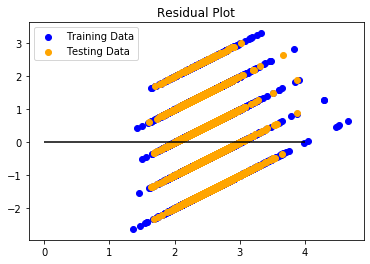

In [26]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fitting our model with all of our features in X
model.fit(X_train, y_train)
score = model.score(X_train, y_train)
print(f"R2 Score: {score}")

R2 Score: 0.059087038184129304
